In [10]:

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define a simple Gaussian noise function
def generate_gaussian_noise(size):
    return np.random.normal(loc=0.0, scale=1.0, size=size)

In [12]:
rng = np.random.default_rng()

In [ ]:
data = rng.multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]], size=150000)

Y = data[:,0]

In [19]:
# Create and use NPFocus detector
## One needs to provide some quantiles to track the null distribuition over
quantiles = [np.quantile(Y[:100], q) for q in [0.25, 0.5, 0.75]]
## the detector can be initialised with those quantiles
detector = NPFocus(quantiles)

stat_over_time = []

for y in Y:
    detector.update(y)
    # we can sum the statistics over to get a detection
    # see  (Romano, Eckley, and Fearnhead 2024) for more details
    stat_over_time += [np.sum(detector.statistic())]
    #if np.sum(detector.statistic()) > 25:
    #    break


changepoint_info = detector.changepoint()
print(changepoint_info["stopping_time"])

118264


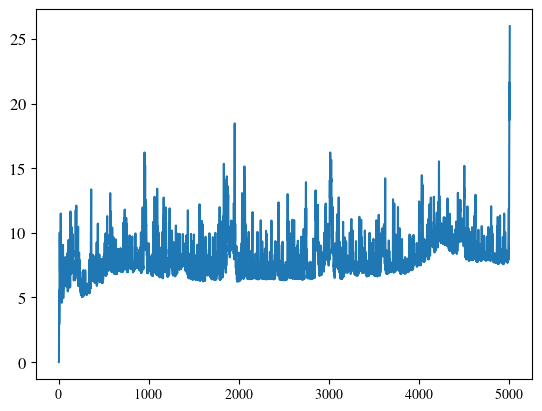

In [11]:
plt.plot(stat_over_time)